transaction_date,1,2,3,4,5,6
transaction_items,,,,,,
"Candy City,Gummy Worms",9559,9996,9986,10043,9801,9934
"Candy City,Orange Beans",9774,10037,9611,9914,9964,10106
"Exotic Extras,Beef Chicharon",9665,10001,9816,9890,10028,9902
"Exotic Extras,Kimchi and Seaweed",9676,9949,9967,9921,9773,10104
"HealthyKid 3+,Gummy Vitamins",9681,9980,10145,9842,9948,9980
"HealthyKid 3+,Nutrional Milk",9727,9691,9876,9786,9881,9767
"HealthyKid 3+,Yummy Vegetables",9959,10256,9896,9861,9735,9722


<AxesSubplot:xlabel='transaction_date'>

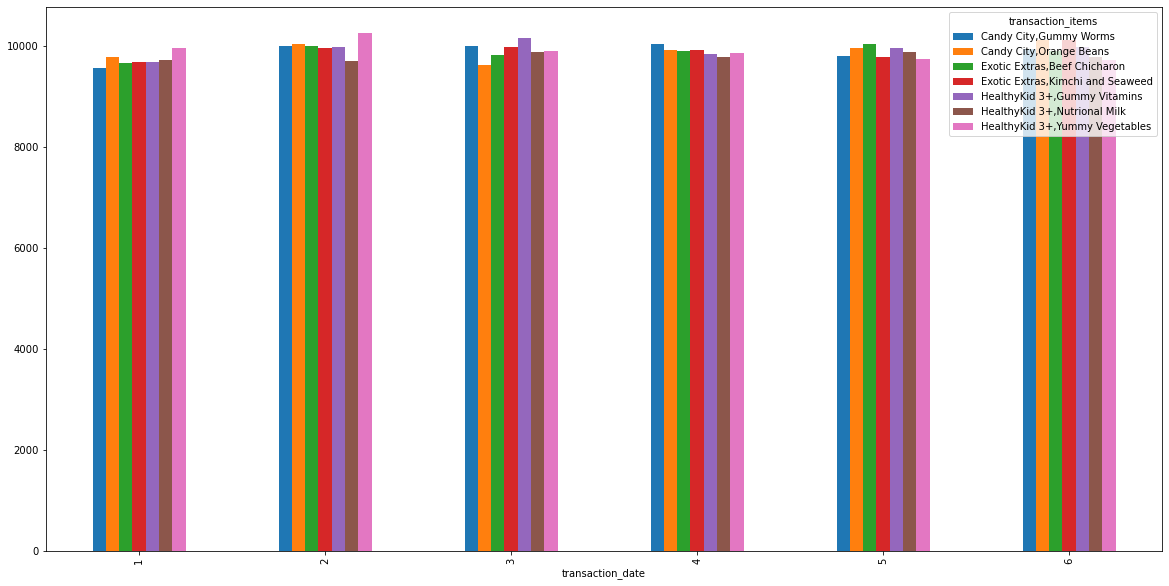

In [52]:
import pandas as pd
import datetime
import json
with open('transaction-data-adhoc-analysis.json','r') as f:
    data=json.load(f)
transdf=pd.DataFrame(data)
transdf["transaction_items"]=transdf["transaction_items"].str.split(";")
transdf=transdf.explode("transaction_items").reset_index(drop=True)
def quantity(name):
    quantity=name[-4:]
    return quantity
transdf["quantity"]=transdf["transaction_items"].apply(quantity)
transdf
transdf['quantity'] = transdf['quantity'].str.extract('(\d+)', expand=False)
transdf['quantity'] = transdf['quantity'].astype(int)
def product(name):
    product=name[:-5]
    return product
transdf["transaction_items"]=transdf["transaction_items"].apply(product)
transdf['transaction_date'] =  pd.to_datetime(transdf['transaction_date'])
qty=transdf.groupby([transdf.transaction_date.dt.month,"transaction_items"])["quantity"].sum().unstack(level=0)
display(qty)
qty.transpose().plot.bar(figsize=(20,10))
'''

The first few codes opens the files (JSON) and reads it and then the transdf which is the next line with the str.split seperates the values within the transaction items column
so that it splits per item
the trans df.explode puts each item in a new row
the def quantity gets the quantity of the transaction items column and then puts it in a new column
we extract the non numeric characters in the quantity column and then transform it in a new variable
for the def product function we subtract the quantity
we transform the transaction date column in to a datetime format
next isi group by transaction date month and transaction items
sum the quantity and then unstack it so it becomes in table form

'''

transaction_date,1,2,3,4,5,6,price
transaction_items,,,,,,,
"Candy City,Gummy Worms",1433850,1499400,1497900,1506450,1470150,1490100,150
"Candy City,Orange Beans",1945026,1997363,1912589,1972886,1982836,2011094,199
"Exotic Extras,Beef Chicharon",12554835,12991299,12750984,12847110,13026372,12862698,1299
"Exotic Extras,Kimchi and Seaweed",7731124,7949251,7963633,7926879,7808627,8073096,799
"HealthyKid 3+,Gummy Vitamins",14521500,14970000,15217500,14763000,14922000,14970000,1500
"HealthyKid 3+,Nutrional Milk",19356730,19285090,19653240,19474140,19663190,19436330,1990
"HealthyKid 3+,Yummy Vegetables",4979500,5128000,4948000,4930500,4867500,4861000,500


<AxesSubplot:xlabel='transaction_date'>

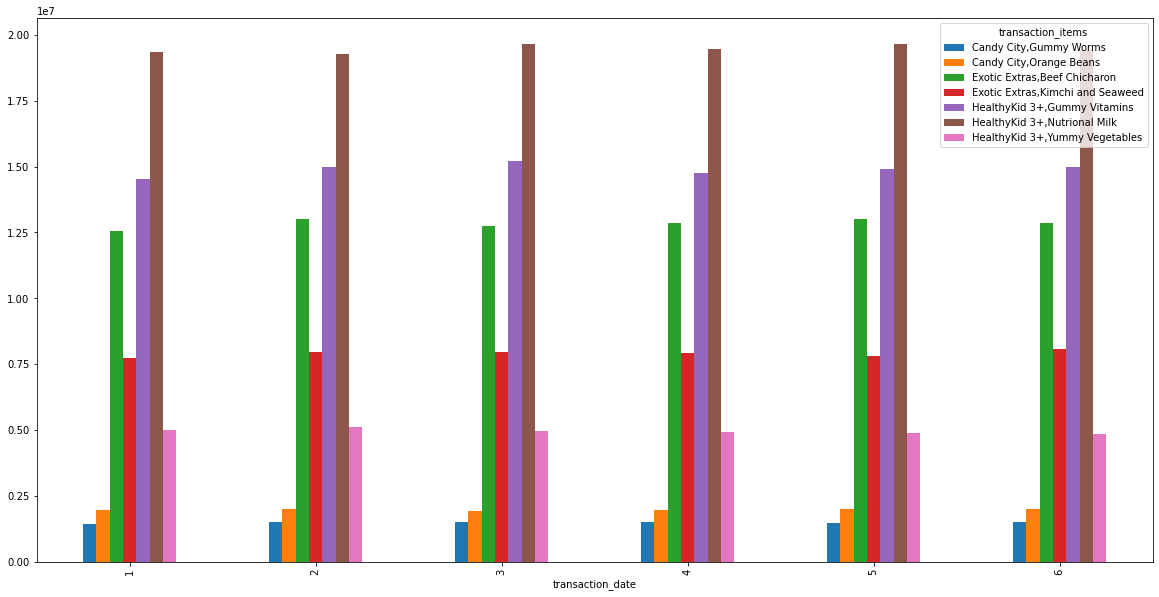

In [55]:
qty["price"]=[150,199,1299,799,1500,1990,500]
for i in qty.keys():
    qty[i]=qty[i]*qty["price"]
qty.drop("price", inplace = True, axis=1)
qty["price"]=[150,199,1299,799,1500,1990,500]
display(qty)
qty.drop(["price"],axis=1).transpose().plot.bar(figsize=(20,10))
'''
extract the price manually and then put it in a new column
multiply the price column with each column in the previous table
since the for loop also multiplied the qunatity price to itself i replace the column with the original values of the price

'''

In [57]:
customers=transdf.groupby([transdf.transaction_date.dt.month, "name"]).size().unstack(fill_value=0).transpose()
repeaters=[0]
for i in customers.keys():
    try:
        repeaters.append(len(customers.loc[(customers[i]!=0)&(customers[i+1]!=0)]))
    except KeyError:
        break
inactive=[0]
inactive.append(len(customers.loc[(customers[1]!=0) & (customers[2] == 0)])) 
inactive.append(len(customers.loc[((customers[1]!=0) | (customers[2] != 0)) & (customers[3] == 0)]))
inactive.append(len(customers.loc[((customers[1]!=0) | (customers[2] != 0) | (customers[3] != 0)) & (customers[4] == 0)]))
inactive.append(len(customers.loc[((customers[1]!=0) | (customers[2] != 0) | (customers[3] != 0) | (customers[4] != 0)) & (customers[5] == 0)]))
inactive.append(len(customers.loc[((customers[1]!=0) | (customers[2] != 0) | (customers[3] != 0) | (customers[4] != 0) | (customers[5] != 0)) & (customers[6] == 0)]))
engage=[]
engage.append(len(customers.loc[(customers[1]!=0)])) 
engage.append(len(customers.loc[(customers[1]!=0) & (customers[2] != 0)])) 
engage.append(len(customers.loc[((customers[1]!=0) & (customers[2] != 0)) & (customers[3] != 0)]))
engage.append(len(customers.loc[((customers[1]!=0) & (customers[2] != 0) & (customers[3] != 0)) & (customers[4] != 0)]))
engage.append(len(customers.loc[((customers[1]!=0) & (customers[2] != 0) & (customers[3] != 0) & (customers[4] != 0)) & (customers[5] != 0)]))
engage.append(len(customers.loc[((customers[1]!=0) & (customers[2] != 0) & (customers[3] != 0) & (customers[4] != 0) & (customers[5] != 0)) & (customers[6] != 0)]))
customer = pd.DataFrame(
    {'Repeaters': repeaters,
     'Inactive': inactive,
     'Engaged': engage
    },index=["January", "February", "March", "April", "May", "June"])
finalcustomer=customer.transpose()
display(finalcustomer)

'''

we grouped by transaction date month and name and then determine the size so that we can see how many times a customer bought in each month
since for the repeaters we have to check whether the customer bought last month and this month we put it in a for loop that checks whether the customer
fulfilled the criteria and gets the length of that dataframe and puts it in a list
same goes for the inactive dapat we check whether the customer bought the previous months and did not buy in the current month
same goes for the engage if we have to check whther the customer bought in the previous month and the current month
we put it all in a data frame then added the months as the indexes and then transpose the data frame


'''

,January,February,March,April,May,June
Repeaters,0,5172,5216,5154,5110,5193
Inactive,0,1416,1747,1909,1917,1835
Engaged,6588,5172,4126,3289,2667,2190


<AxesSubplot:>

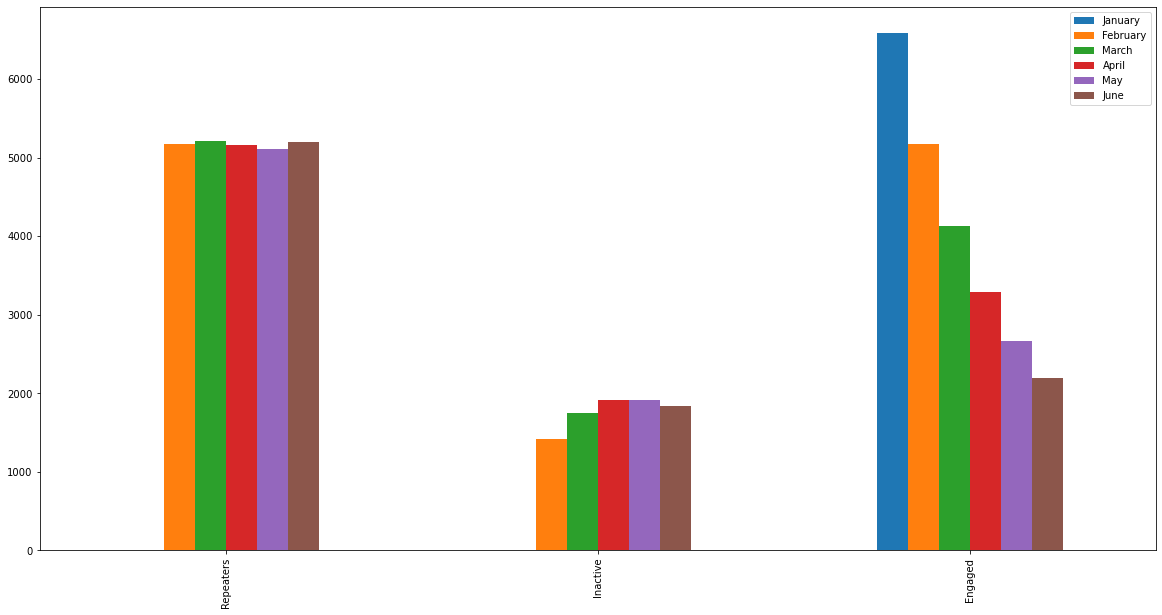

In [56]:
finalcustomer.plot.bar(figsize=(20,10))